# **Analysis of ajaykarthick/imdb-movie-reviews Dataset**

In [1]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

# Load the IMDB movie reviews dataset
dataset = load_dataset('ajaykarthick/imdb-movie-reviews')
df = dataset['train'].to_pandas()  # Convert to a Pandas DataFrame for easy manipulation

# Display the first few rows to understand the structure
df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/53.6M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/13.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/40000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

,review,label
0,"Ms Aparna Sen, the maker of Mr & Mrs Iyer, dir...",0
1,"I have seen this film only once, on TV, and it...",0
2,I was only fourteen when I first saw the Alien...,1
3,This marvelous short will hit home with everyo...,0
4,If you are 10 years old and never seen a movie...,1


# **Task 1: Sentiment Analysis (Proportion of Positive vs. Negative Reviews)**

In [3]:
import matplotlib.pyplot as plt

# Proportion of each sentiment (0 = Negative, 1 = Positive)
sentiment_counts = df['label'].value_counts(normalize=True)

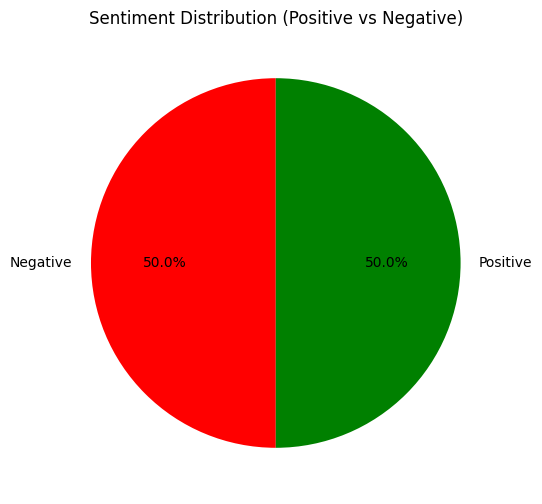

In [4]:
# Visualization: Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Sentiment Distribution (Positive vs Negative)')
plt.show()

# **Task 2: Average Length of Reviews**

In [5]:
# Calculate the length of each review
df['review_length'] = df['review'].apply(len)

# Calculate average length by sentiment
avg_length_by_sentiment = df.groupby('label')['review_length'].mean()

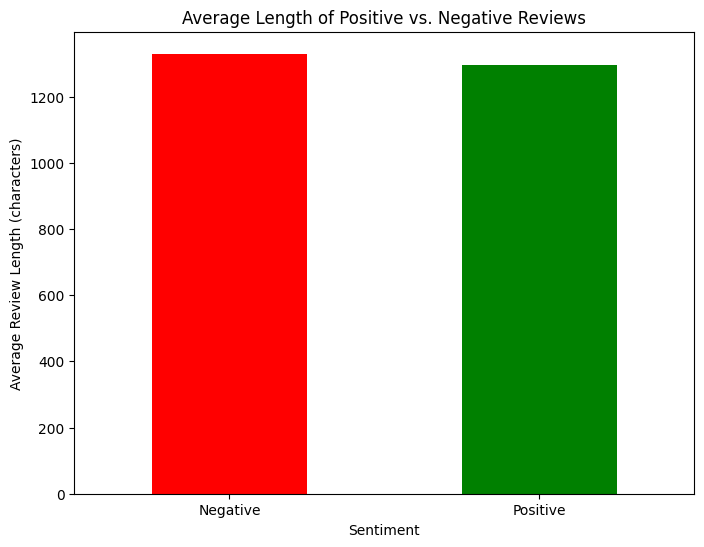

In [6]:
# Visualization: Bar Chart
plt.figure(figsize=(8, 6))
avg_length_by_sentiment.plot(kind='bar', color=['red', 'green'])
plt.title('Average Length of Positive vs. Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length (characters)')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

# **Task 3: Word Frequency Analysis in positive and negative reviews.**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Preprocess the text: Lowercase and remove stopwords
vectorizer = CountVectorizer(stop_words='english')

# Combine positive and negative reviews for consistent vocabulary
all_reviews = pd.concat([df[df['label'] == 1]['review'], df[df['label'] == 0]['review']])

# Fit the vectorizer once on all reviews
vectorizer.fit(all_reviews)

# Create word count vectors for positive and negative reviews
positive_reviews = df[df['label'] == 1]['review']
negative_reviews = df[df['label'] == 0]['review']
positive_word_count = vectorizer.transform(positive_reviews)
negative_word_count = vectorizer.transform(negative_reviews)

# Sum up the word frequencies for positive and negative reviews
positive_word_sum = np.array(positive_word_count.sum(axis=0)).flatten()
negative_word_sum = np.array(negative_word_count.sum(axis=0)).flatten()

# Get the words and their corresponding frequencies
words = vectorizer.get_feature_names_out()

In [10]:
# Create DataFrames for positive and negative word frequencies
positive_word_df = pd.DataFrame({'word': words, 'count': positive_word_sum}).sort_values(by='count', ascending=False).head(10)
negative_word_df = pd.DataFrame({'word': words, 'count': negative_word_sum}).sort_values(by='count', ascending=False).head(10)

# Display the results
print("Top 10 words in positive reviews:")
print(positive_word_df)

print("\nTop 10 words in negative reviews:")
print(negative_word_df)

Top 10 words in positive reviews:
         word  count
10874      br  83205
54730   movie  40279
30296    film  29959
47974    like  17895
44144    just  17077
34704    good  11816
6815      bad  11752
82734    time   9931
66720  really   9872
24222     don   8581

Top 10 words in negative reviews:
         word  count
10874      br  78517
30296    film  34013
54730   movie  30266
47974    like  14286
34704    good  12062
44144    just  11428
35309   great  10473
78491   story  10375
82734    time  10239
66720  really   8572


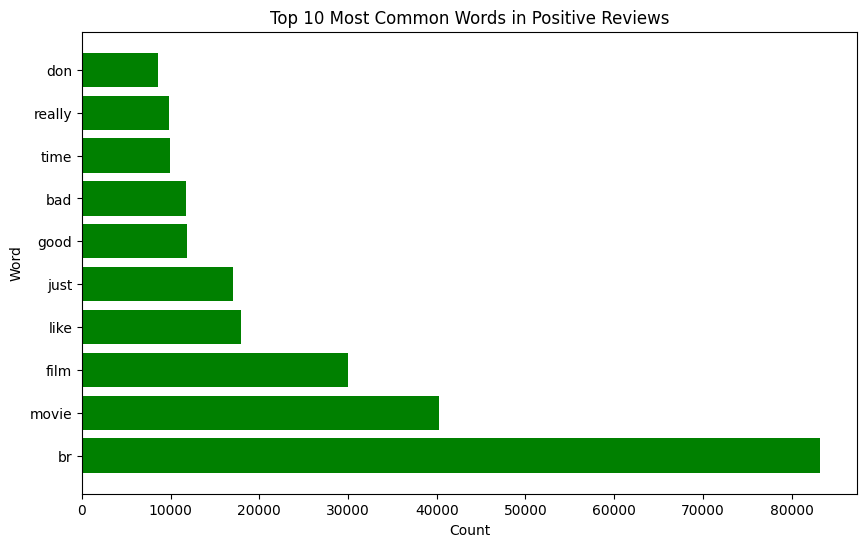

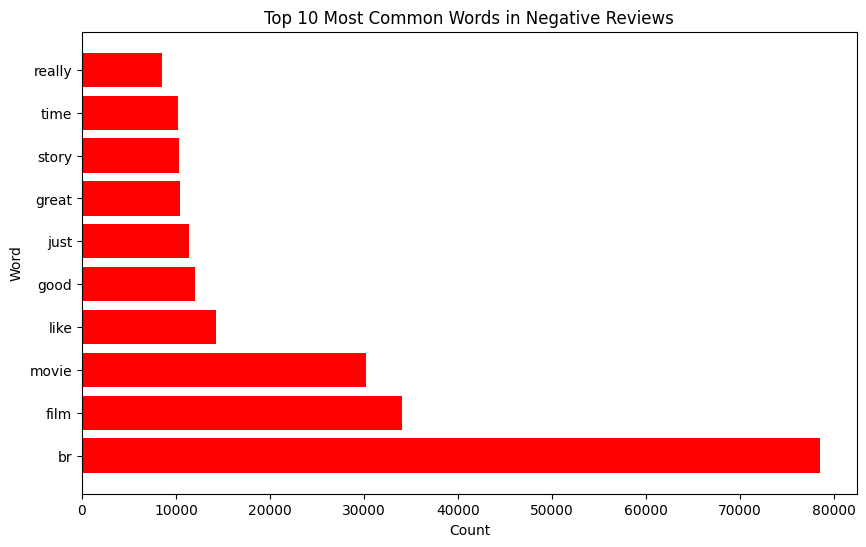

In [11]:
# Plot the top 10 most common words for positive reviews
plt.figure(figsize=(10, 6))
plt.barh(positive_word_df['word'], positive_word_df['count'], color='green')
plt.title('Top 10 Most Common Words in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Plot the top 10 most common words for negative reviews
plt.figure(figsize=(10, 6))
plt.barh(negative_word_df['word'], negative_word_df['count'], color='red')
plt.title('Top 10 Most Common Words in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()